<a href="https://colab.research.google.com/github/PratikshaChimankar/CAPSTONE-PROJECT-1--Play-Store-App-Review-Analysis/blob/main/PSARA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [93]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from pylab import rcParams

In [94]:
from google.colab import files
from IPython.display import Image
uploaded =files.upload()

KeyboardInterrupt: ignored

In [ ]:
Image('app- image1.jpg',
      width= 525)

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
add1='/content/drive/MyDrive/CAPSTONE PROJECT-1/Play Store Data.csv'
add2='/content/drive/MyDrive/CAPSTONE PROJECT-1/ User Reviews.csv'
data1=pd.read_csv(add1)
data2=pd.read_csv(add2)

In [98]:
data1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [99]:
data1.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [100]:
data1.shape


(10841, 13)

There are 10841 rows and 12 coloumns.

# Data Cleaning

In [101]:
# cheack there is any null value or not.
data1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

so here are many null values but the gretor number of null values has Rating i.e 1474

In [102]:
# Delet all null values
data1.dropna(how = 'any',inplace = True)

In [ ]:
data1.info()

In [103]:
def printinfo():
    pra = pd.DataFrame(index=data1.columns)
    pra['data_type'] = data1.dtypes
    pra['unique_count'] = data1.nunique()
    return pra

In [104]:
printinfo()

,data_type,unique_count
App,object,8190
Category,object,33
Rating,float64,39
Reviews,object,5990
Size,object,413
Installs,object,19
Type,object,2
Price,object,73
Content Rating,object,6
Genres,object,115


 Here we can see unique count and there data types.

In [105]:
data1.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Here is onaly one coloumn.

Duplicate values in data1

In [106]:
print("num Unique app names = ", len(data1['App'].unique()))
print("num of the total app names = ", data1.shape[0])
print("duplicate apps = ",len(data1['App'])- len(data1['App'].unique()))

num Unique app names =  8190
num of the total app names =  9360
duplicate apps =  1170


In [107]:
# here we are delet all duplicate values.
data1.drop_duplicates(subset = 'App', keep = 'first' ,inplace = True)

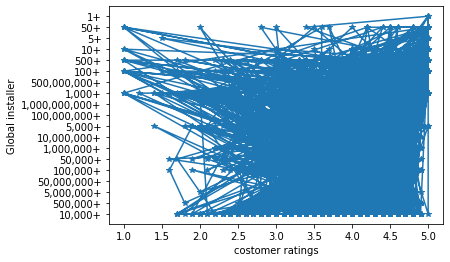

In [108]:
x= data1['Rating']
y=data1['Installs']
plt.xlabel('costomer ratings')
plt.ylabel('Global installer')
plt.plot(x,y,marker='*')
plt.show()

#Here we are looking volum of every app.

In [109]:
volume_of_the_app = data1["Category"].value_counts()
volume_of_the_app.sort_index(inplace=True)
volume_of_the_app 

ART_AND_DESIGN           60
AUTO_AND_VEHICLES        73
BEAUTY                   42
BOOKS_AND_REFERENCE     169
BUSINESS                263
COMICS                   54
COMMUNICATION           256
DATING                  134
EDUCATION               118
ENTERTAINMENT           102
EVENTS                   45
FAMILY                 1607
FINANCE                 302
FOOD_AND_DRINK           94
GAME                    912
HEALTH_AND_FITNESS      244
HOUSE_AND_HOME           62
LIBRARIES_AND_DEMO       63
LIFESTYLE               301
MAPS_AND_NAVIGATION     118
MEDICAL                 290
NEWS_AND_MAGAZINES      204
PARENTING                50
PERSONALIZATION         296
PHOTOGRAPHY             263
PRODUCTIVITY            301
SHOPPING                180
SOCIAL                  203
SPORTS                  260
TOOLS                   717
TRAVEL_AND_LOCAL        187
VIDEO_PLAYERS           148
WEATHER                  72
Name: Category, dtype: int64

Text(0.5, 0, 'installer')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


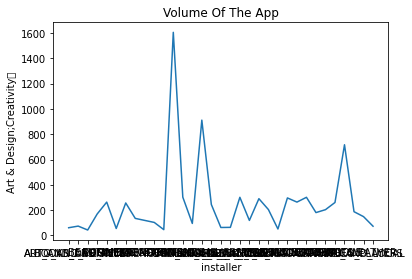

In [110]:
plt.plot(volume_of_the_app)
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Volume Of The App')
plt.ylabel('Art & Design;Creativity	')
plt.xlabel('installer')

# install information

In [111]:
data1['Installs'].dtype
data1['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [112]:
# Removing all the commas and plus sign
data1['Installs'] = data1['Installs'].apply(lambda x: x.replace(',',''))
data1['Installs'] = data1['Installs'].apply(lambda x: x.replace('+',''))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


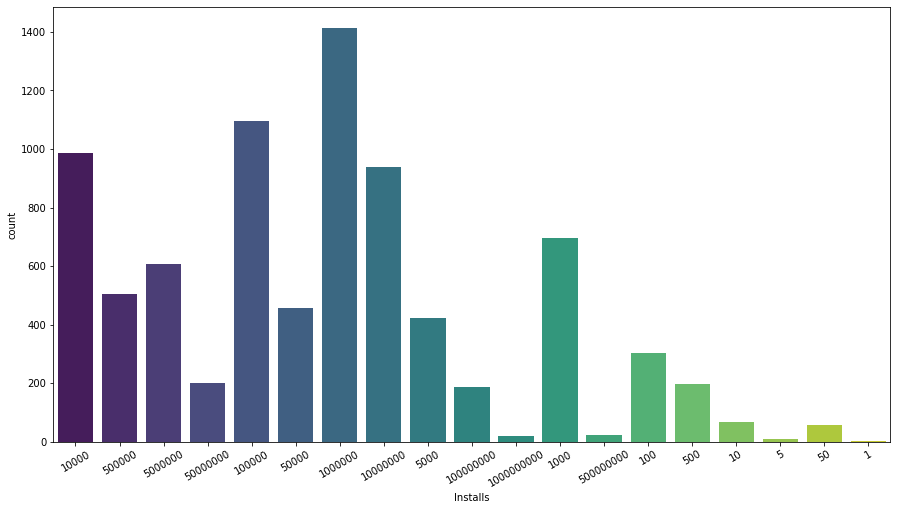

In [113]:
plt.figure(figsize=(15,8))
follow= sns.countplot(data1['Installs'], palette= "viridis" )
follow.set_xticklabels(follow.get_xticklabels(), rotation = 30)
plt.show()

# Reviews Information

In [115]:
data1['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

Text(0.5, 1.0, 'Distribution of Ratings')

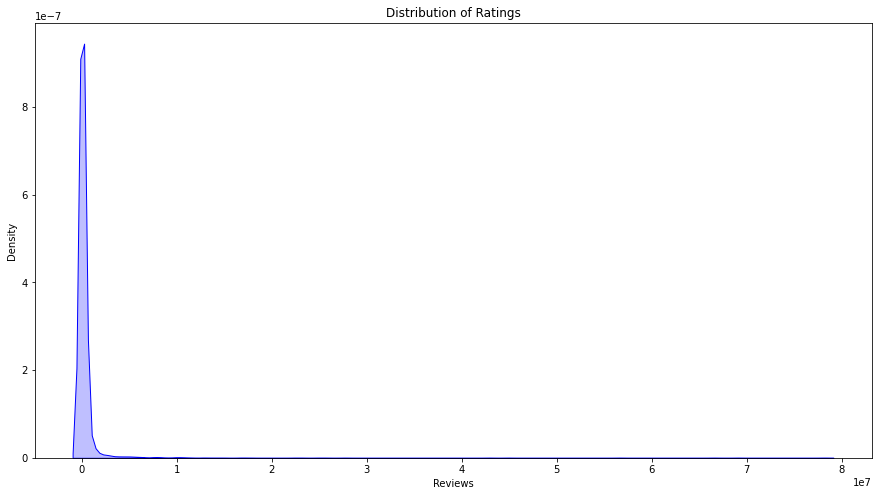

In [114]:
#obeject data type converting into integer datatype
data1['Reviews'] = data1['Reviews'].astype(dtype = 'int')
plt.figure(figsize=(15,8))
sns.kdeplot(data1['Reviews'], color = 'blue', shade = True)
plt.title('Distribution of Ratings')

In [130]:
print("Number of Apps with more than 1M reviews",data1[data1['Reviews'] > 1000000].shape[0])
print("\nTop 20 apps with most reviews: \n",data1[data1['Reviews'] > 1000000].sort_values(by = 'Reviews', ascending = False).head(20)['App'])

Number of Apps with more than 1M reviews 349

Top 20 apps with most reviews: 
 2544                                             Facebook
336                                    WhatsApp Messenger
2545                                            Instagram
335              Messenger – Text and Video Chat for Free
1670                                       Clash of Clans
4005              Clean Master- Space Cleaner & Antivirus
1654                                       Subway Surfers
3665                                              YouTube
7536    Security Master - Antivirus, VPN, AppLock, Boo...
1660                                         Clash Royale
1655                                     Candy Crush Saga
378           UC Browser - Fast Download Private & Secure
2550                                             Snapchat
4568      360 Security - Free Antivirus, Booster, Cleaner
1722                                       My Talking Tom
1675                                          8 Bal

 More tahn 1M reviews app


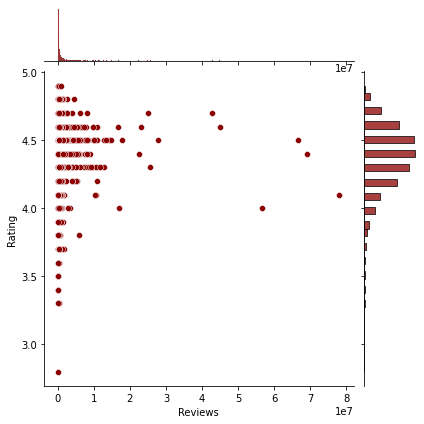

Below 1M reviews app


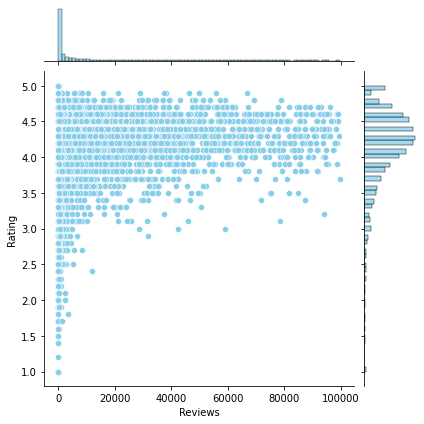

In [138]:
print(' More tahn 1M reviews app')
sns.jointplot(x='Reviews',y='Rating',data =data1[data1['Reviews']>100000],color='darkred')
plt.show()

print('Below 1M reviews app')
sns.jointplot(x='Reviews',y='Rating',data =data1[data1['Reviews']<100000],color ='skyblue')
plt.show()

In [117]:
data2.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [118]:
data2.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [119]:
data2.shape

(64295, 5)

# Data cleaning

In [120]:
# cheack there is any null value or not.
data2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [121]:
# Delet all null values
data2.dropna(how = 'any',inplace = True)

In [ ]:
data2.info()

In [123]:
def printinfo():
    pra2 = pd.DataFrame(index=data1.columns)
    pra2['data_type'] = data2.dtypes
    pra2['unique_count'] = data2.nunique()
    return pra2

In [124]:
printinfo()

,data_type,unique_count
App,object,865.0
Category,NaN,NaN
Rating,NaN,NaN
Reviews,NaN,NaN
Size,NaN,NaN
Installs,NaN,NaN
Type,NaN,NaN
Price,NaN,NaN
Content Rating,NaN,NaN
Genres,NaN,NaN


Duplicate values in data2

In [125]:
print("num Unique app names = ", len(data2['App'].unique()))
print("num of the total app names = ", data2.shape[0])
print("duplicate apps = ",len(data1['App'])- len(data2['App'].unique()))

num Unique app names =  865
num of the total app names =  37427
duplicate apps =  7325


In [126]:
# here we are delet all duplicate values.
data2.drop_duplicates(subset = 'App', keep = 'first' ,inplace = True)

In [127]:
data2.described()

AttributeError: ignored